In [315]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [284]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict

from sklearn.feature_extraction import DictVectorizer

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder

%matplotlib inline

In [233]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [234]:
df.shape

(20640, 10)

In [235]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [236]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [237]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [238]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# EDA

In [239]:
df.shape

(20640, 10)

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

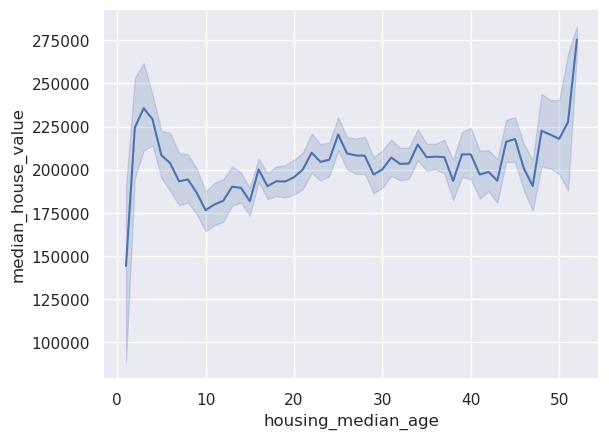

In [240]:
sns.lineplot(x = "housing_median_age", y = "median_house_value", data = df)

In [241]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

<Axes: xlabel='ocean_proximity'>

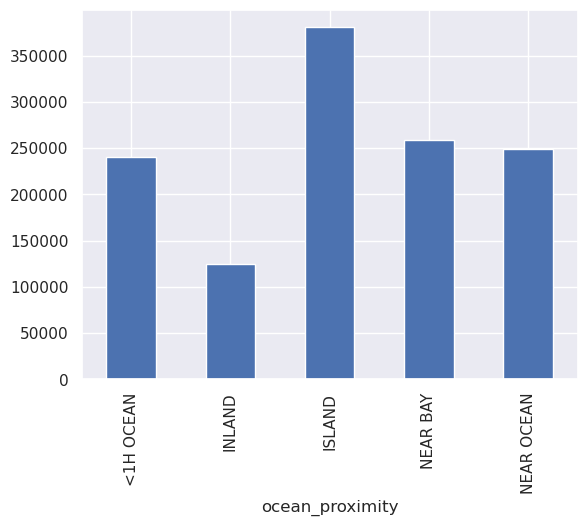

In [242]:
df.groupby("ocean_proximity")['median_house_value'].mean().plot.bar()

<Axes: xlabel='median_house_value', ylabel='Count'>

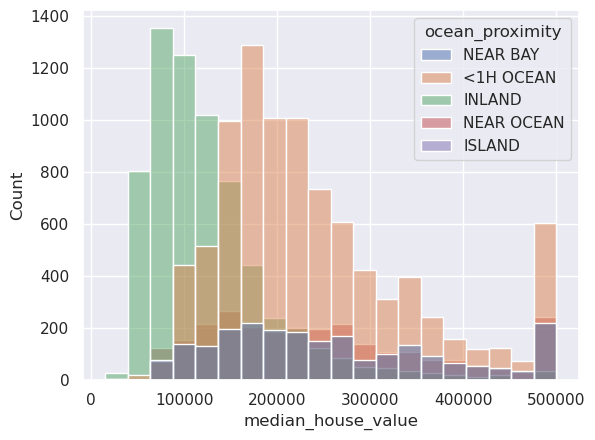

In [243]:
sns.histplot(data=df, x="median_house_value", hue = "ocean_proximity", bins=20)

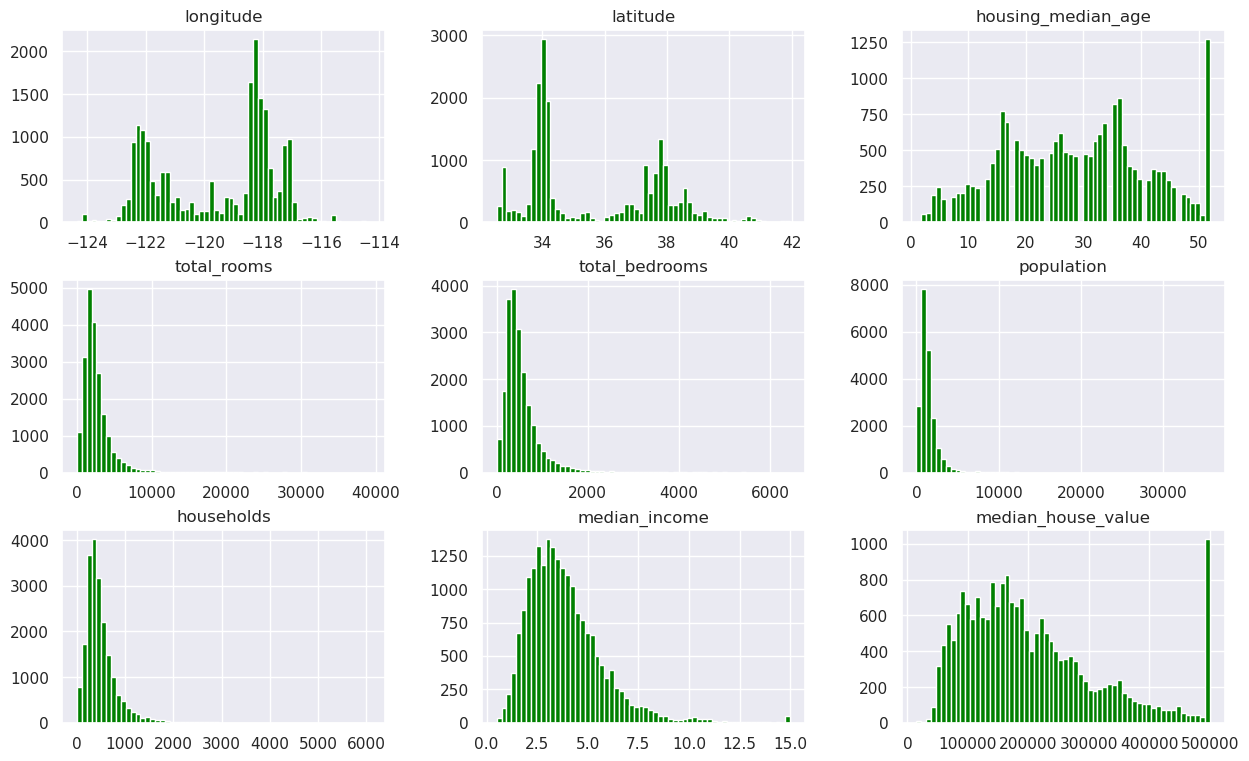

In [244]:
df.hist(bins=60, figsize=(15,9),color="green");plt.show()

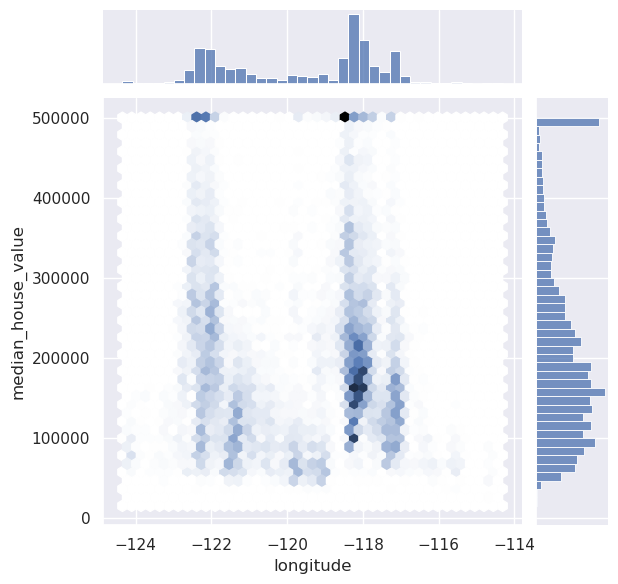

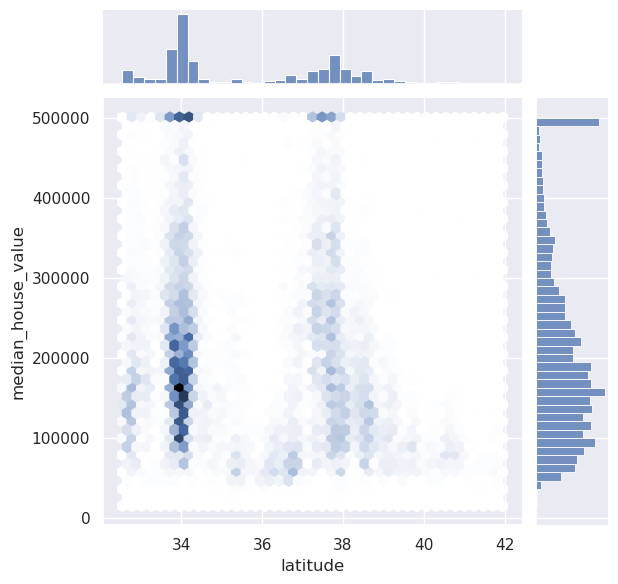

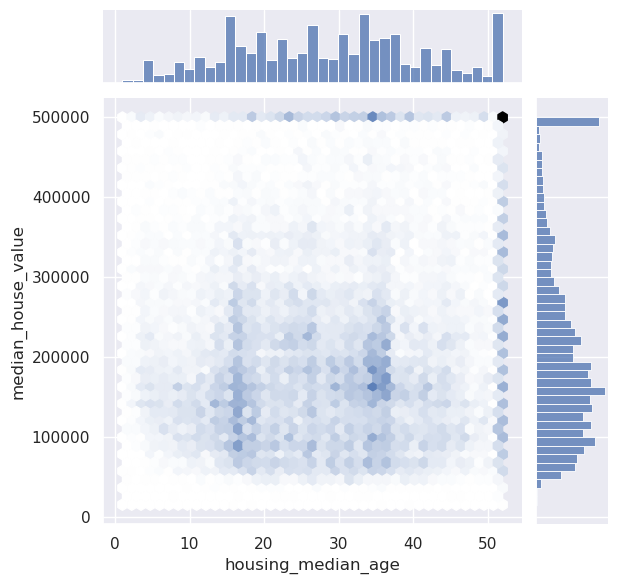

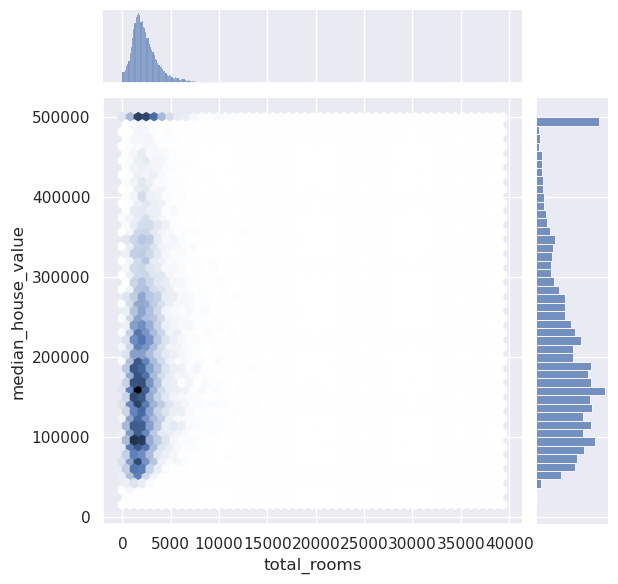

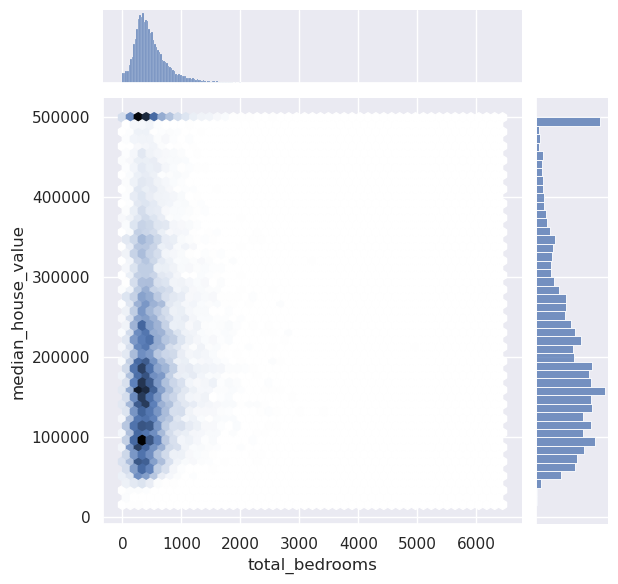

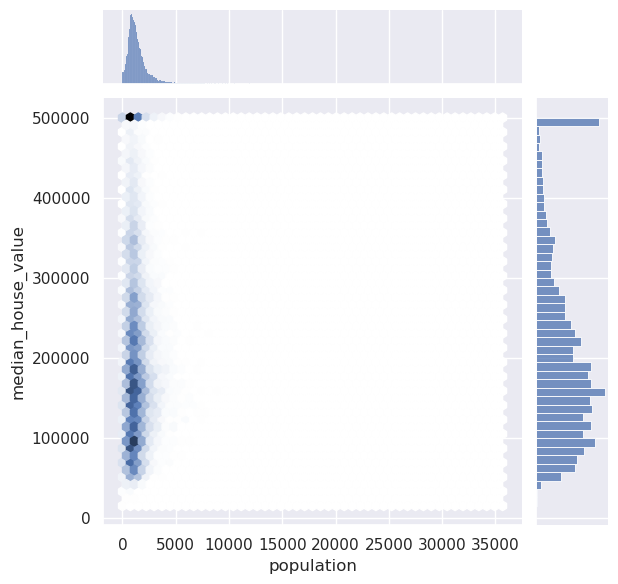

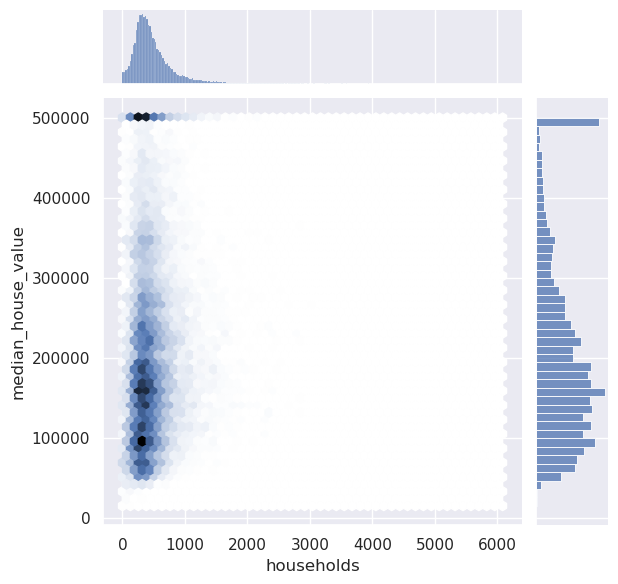

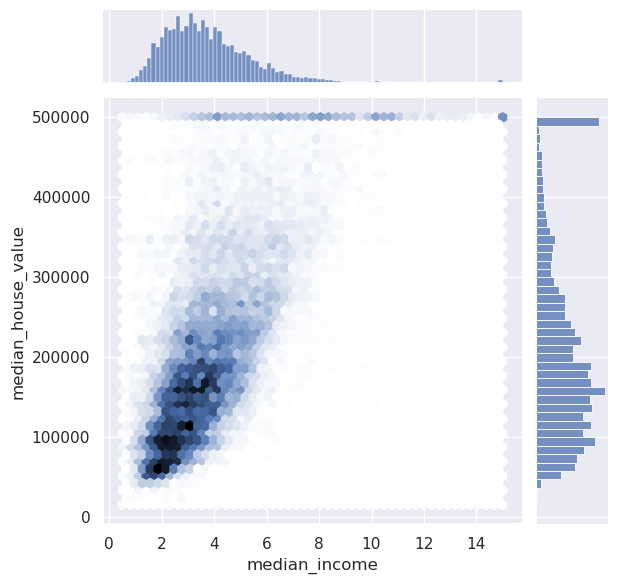

In [245]:
for col in list(df.columns):
    if(col != "ocean_proximity" and col != "median_house_value"):
        sns.jointplot(x = col,  y = "median_house_value",kind = "hex", data = df)
        plt.show()

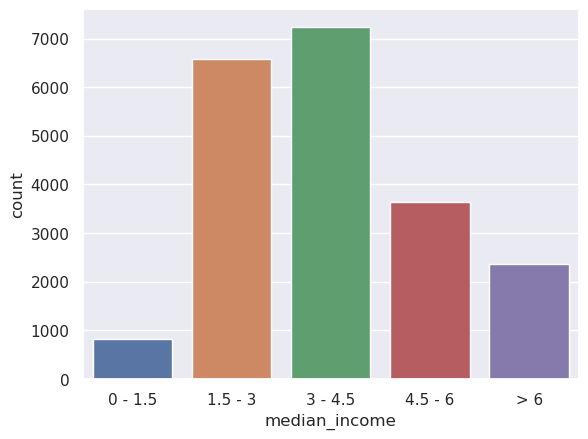

In [246]:
income_bins = pd.cut(df["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])
sns.countplot(x = income_bins);

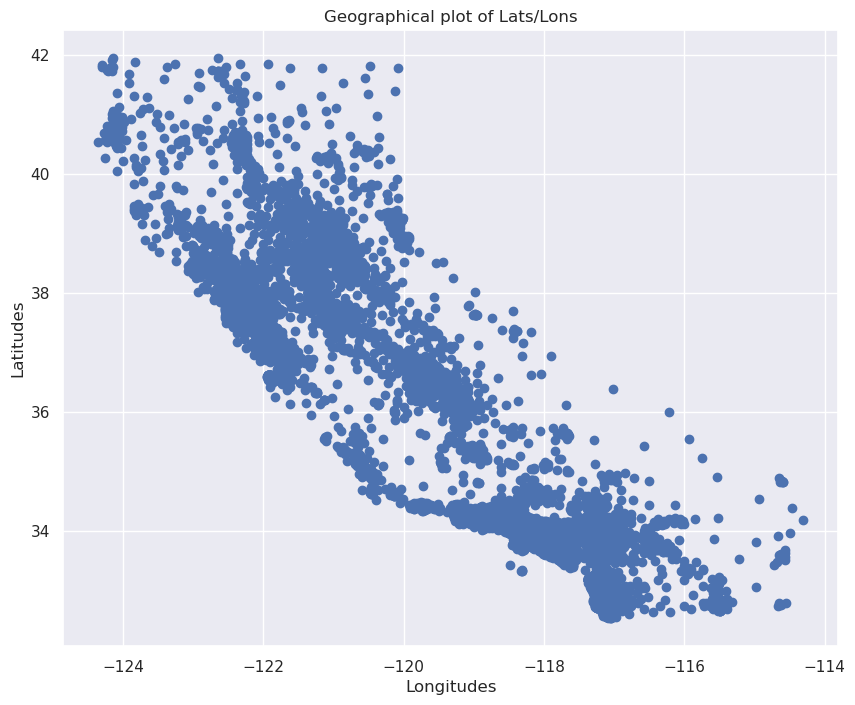

In [247]:
sns.set()
plt.figure(figsize=(10,8))#Figure size
plt.scatter('longitude','latitude',data=df)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

<Figure size 1000x700 with 0 Axes>

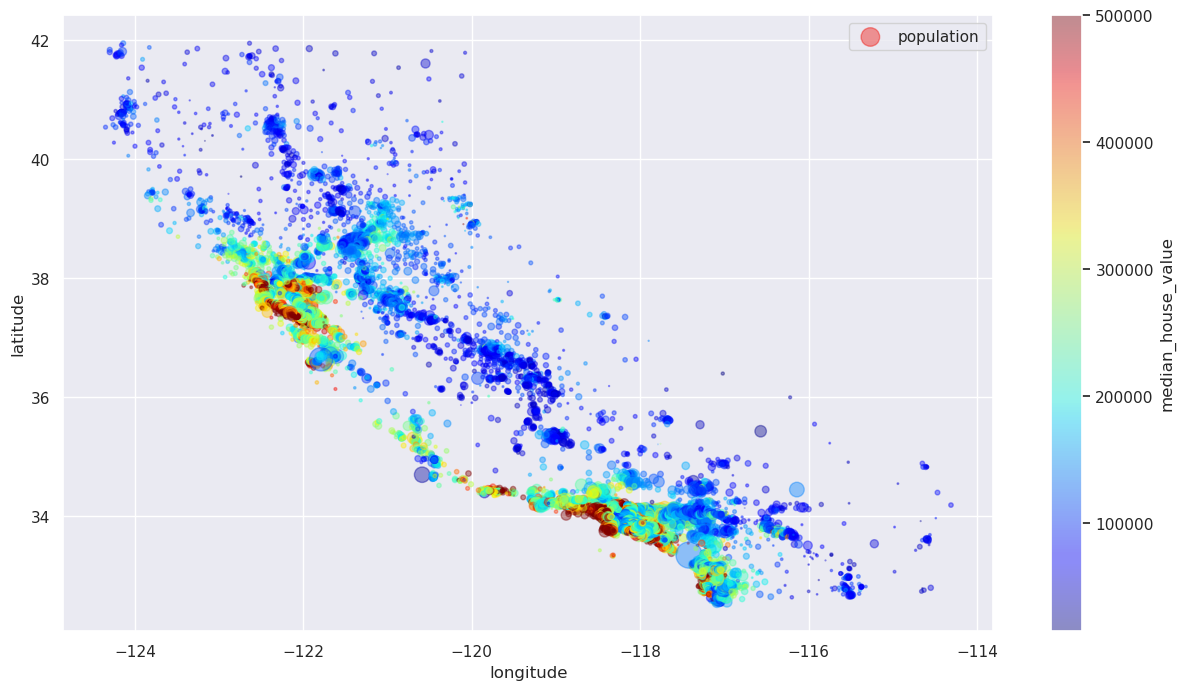

In [248]:
plt.figure(figsize=(10,7));
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

# Handling Missign Value

In [249]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

we have 207 missing values in total_bedrooms column.

In [250]:
df.total_rooms.describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

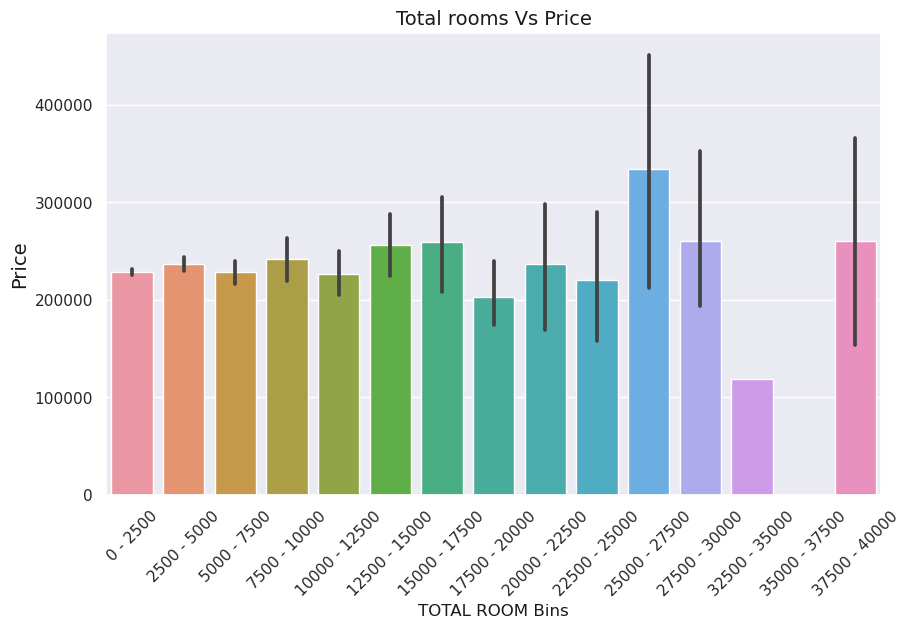

In [251]:
room_bins = pd.cut(df["total_rooms"],
                     bins=[2500,5000,7500, 10000, 12500, 15000, 17500, 20000,22500,25000,27500,30000,32500,35000,37500,40000],
                     labels=["0 - 2500","2500 - 5000", "5000 - 7500", "7500 - 10000", "10000 - 12500", "12500 - 15000", "15000 - 17500", "17500 - 20000", "20000 - 22500", "22500 - 25000","25000 - 27500", "27500 - 30000", "32500 - 35000", "35000 - 37500", "37500 - 40000"])
# sns.countplot(x = room_bins);
plt.figure(figsize=(10,6)) 
sns.barplot(x=room_bins, y = df['median_house_value']) 
plt.title('Total rooms Vs Price', fontsize=14, c='k') 
plt.xlabel('TOTAL ROOM Bins', fontsize=12, c='k') 
plt.xticks(rotation = 45)
plt.ylabel('Price', fontsize=14,c='k') 
plt.show() 

In [252]:
total_rooms_dict = {}
for i in room_bins.unique()[1:room_bins.nunique()]:
    start = int(i.split(" - ")[0])
    end = int(i.split(" - ")[1])
    ff = df[(df['total_rooms']>start) & (df['total_rooms']<end)]
    set_mean = int(ff.total_bedrooms.mean())
    total_rooms_dict[i] = set_mean
total_rooms_dict

{'2500 - 5000': 681,
 '0 - 2500': 332,
 '10000 - 12500': 2010,
 '15000 - 17500': 2862,
 '5000 - 7500': 1185,
 '12500 - 15000': 2515,
 '7500 - 10000': 1617,
 '25000 - 27500': 4302,
 '17500 - 20000': 3171,
 '27500 - 30000': 4356,
 '20000 - 22500': 3699,
 '22500 - 25000': 4308,
 '32500 - 35000': 6445}

In [253]:
room_bins

0                NaN
1        2500 - 5000
2                NaN
3                NaN
4                NaN
            ...     
20635            NaN
20636            NaN
20637            NaN
20638            NaN
20639       0 - 2500
Name: total_rooms, Length: 20640, dtype: category
Categories (15, object): ['0 - 2500' < '2500 - 5000' < '5000 - 7500' < '7500 - 10000' ... '27500 - 30000' < '32500 - 35000' < '35000 - 37500' < '37500 - 40000']

In [254]:
ff = df[(df['total_rooms']>37500)]
set_mean = int(ff.total_bedrooms.mean())
total_rooms_dict["37500 - 40000"] = set_mean

In [255]:
total_rooms_dict

{'2500 - 5000': 681,
 '0 - 2500': 332,
 '10000 - 12500': 2010,
 '15000 - 17500': 2862,
 '5000 - 7500': 1185,
 '12500 - 15000': 2515,
 '7500 - 10000': 1617,
 '25000 - 27500': 4302,
 '17500 - 20000': 3171,
 '27500 - 30000': 4356,
 '20000 - 22500': 3699,
 '22500 - 25000': 4308,
 '32500 - 35000': 6445,
 '37500 - 40000': 5840}

In [256]:
df.total_bedrooms.fillna(-1, inplace = True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [257]:
df.at[290,"total_rooms"]

1256.0

In [258]:
def ind_finder(n):
    for j in room_bins.unique()[1:room_bins.nunique()]:
        start = int(j.split(" - ")[0])
        end = int(j.split(" - ")[1])
        if ((n>start) & (n<end)):
            return j

In [259]:

for i in range(df.shape[0]):
    if df.at[i,"total_bedrooms"] == -1:
        print("\nbefore : ", df.at[i,"total_bedrooms"])
        print(i, ind_finder(i))
        df.at[i, "total_bedrooms"] = total_rooms_dict[ind_finder(i)]
        print("\nafter : ", df.at[i,"total_bedrooms"])


before :  -1.0
290 0 - 2500

after :  332.0

before :  -1.0
341 0 - 2500

after :  332.0

before :  -1.0
538 0 - 2500

after :  332.0

before :  -1.0
563 0 - 2500

after :  332.0

before :  -1.0
696 0 - 2500

after :  332.0

before :  -1.0
738 0 - 2500

after :  332.0

before :  -1.0
1097 0 - 2500

after :  332.0

before :  -1.0
1350 0 - 2500

after :  332.0

before :  -1.0
1456 0 - 2500

after :  332.0

before :  -1.0
1493 0 - 2500

after :  332.0

before :  -1.0
1606 0 - 2500

after :  332.0

before :  -1.0
2028 0 - 2500

after :  332.0

before :  -1.0
2115 0 - 2500

after :  332.0

before :  -1.0
2301 0 - 2500

after :  332.0

before :  -1.0
2323 0 - 2500

after :  332.0

before :  -1.0
2334 0 - 2500

after :  332.0

before :  -1.0
2351 0 - 2500

after :  332.0

before :  -1.0
2412 0 - 2500

after :  332.0

before :  -1.0
2420 0 - 2500

after :  332.0

before :  -1.0
2578 2500 - 5000

after :  681.0

before :  -1.0
2608 2500 - 5000

after :  681.0

before :  -1.0
2647 2500 - 5000



In [260]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

ALL null values are gone

/tmp/ipykernel_32/66995029.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


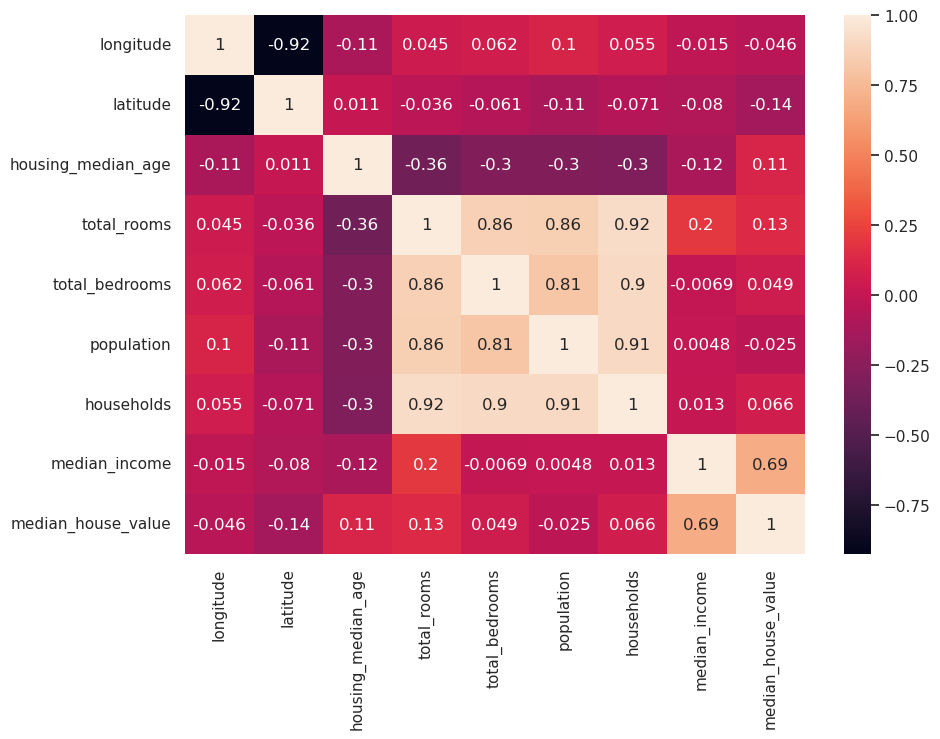

In [261]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Encoding 

In [262]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

We will replace "ocean_proximity" values with sensible int values

In [263]:
df.ocean_proximity = df.ocean_proximity.replace({'NEAR BAY': 1,
                                   '<1H OCEAN': 3,
                                   'NEAR OCEAN': 2,
                                    "ISLAND" : 4,
                                                "INLAND":0 })

# Data Splitting

In [264]:
x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Kfold & cross val

In [266]:
kf = KFold(shuffle=True, random_state=42, n_splits=5)

In [354]:
s = StandardScaler()
lr = LinearRegression()
lo = Lasso()
ri = Ridge()
br = BayesianRidge(verbose=False)

In [355]:
estimator = Pipeline([("scaler", s),
                      ("BayesianRidge", ri)])

In [356]:
predic= cross_val_predict(estimator, x, y, cv=kf)

In [357]:
r2_score(y, predic)

0.6136648553381245

In [353]:
mean_absolute_error(y,predic)

42441.64776165582

# HyperParameter Tuning

In [384]:
 
estim = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", ri)])

params = {
    'polynomial_features__degree': [1, 2, 3,4,5],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estim, params, cv=kf)

In [386]:
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3, 4, 5],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [401]:
y_predict = grid.predict(x_test)
r2_score(list(y_test), y_predict)

0.7194726398970883

In [388]:
grid.best_params_

{'polynomial_features__degree': 3, 'ridge_regression__alpha': 20.0}

In [371]:
import joblib

In [373]:
joblib.dump(grid, "model.pkl")

['model.pkl']

In [396]:
df_eval = pd.DataFrame({"Y_test": list(y_test) , "Y_predicted" : y_predict})

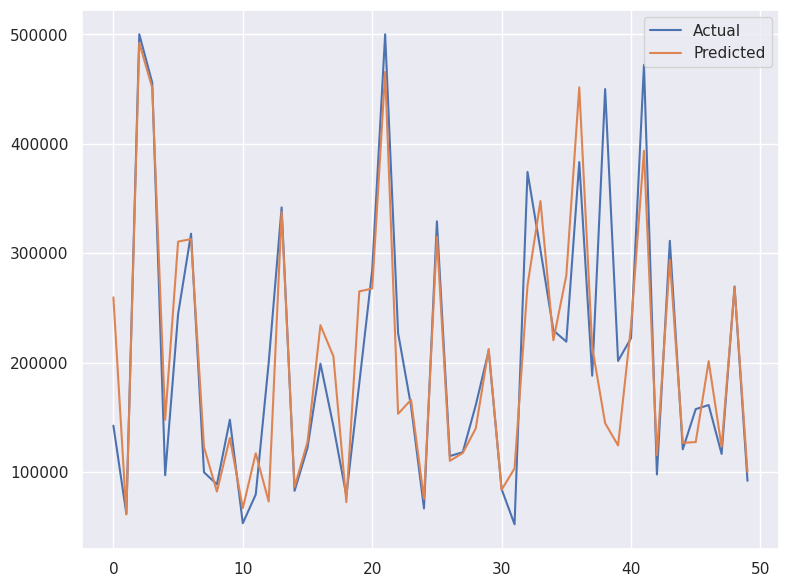

In [399]:
plt.figure(figsize=(9,7))
plt.plot(df_eval[:50])
plt.legend(["Actual" , "Predicted"])